**BITS AI PROJECT **


Project on : 4. Diamond Price Analysis

To analyze the price of diamonds according to their attributes, we first need to have a dataset containing diamond prices based on their features

1. Carat
2. Cut
3. Colour
4. Clarity
5. Depth
6. Table
7. Price
8. Size
Dataset: https://drive.google.com/file/d/1I4wk5hVhl8l2Jl7sNbOq3du96CBZyTEq/view?usp=sharing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv('diamonds.csv')
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Create new feature: size = x * y * z
df['size'] = df['x'] * df['y'] * df['z']

In [5]:
# Features and target
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'size']]
y = df['price']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Column types
categorical_features = ['cut', 'color', 'clarity']
numerical_features = ['carat', 'depth', 'table', 'size']

In [8]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [9]:
#Machine learning pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [10]:
# Train model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [11]:
# Predict
y_pred = model.predict(X_test)

In [12]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [13]:
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error: $279.53
R^2 Score: 0.981


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load dataset
df = pd.read_csv('diamonds.csv')

In [16]:
# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [17]:
# Create 'size' feature as volume
df['size'] = df['x'] * df['y'] * df['z']

In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

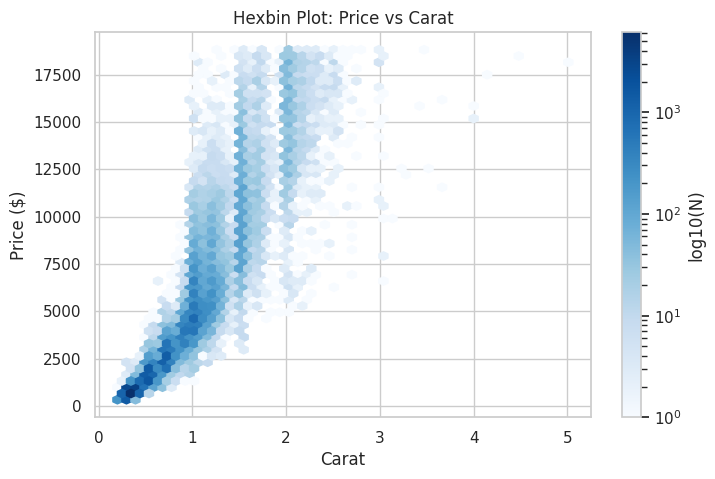

In [24]:
# Price vs Carat
plt.figure(figsize=(8, 5))
plt.hexbin(df['carat'], df['price'], gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


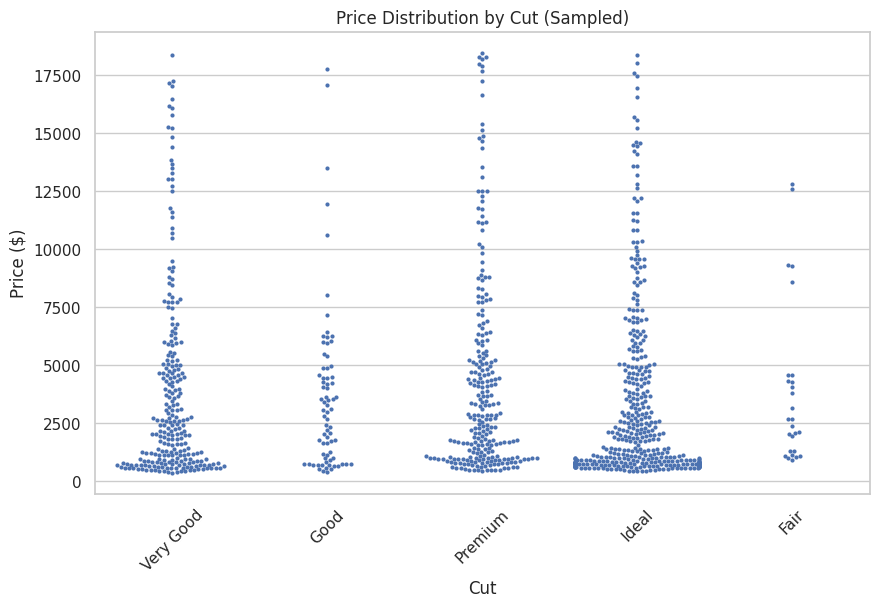

In [20]:
# Swarm Plot: Price by Cut
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df.sample(1000), x='cut', y='price', size=3)
plt.title('Price Distribution by Cut (Sampled)')
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

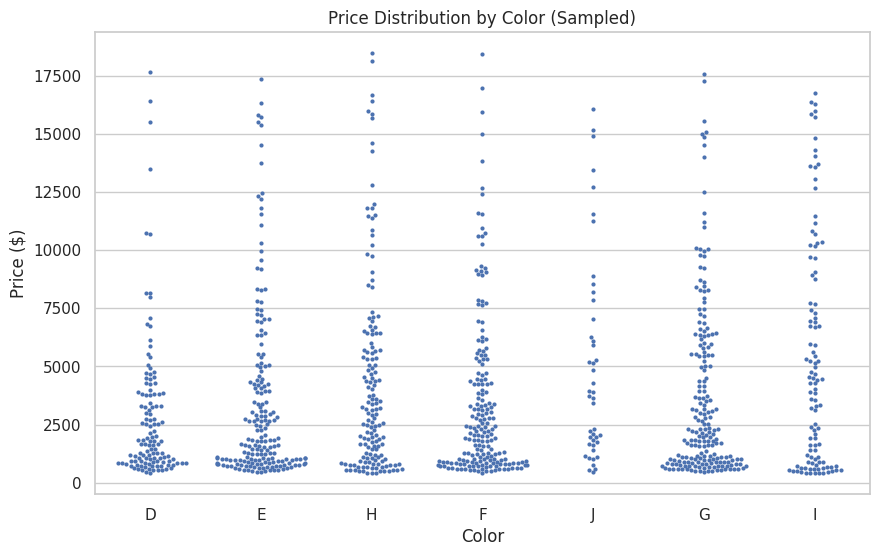

In [21]:
# Swarm Plot: Price by Color
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df.sample(1000), x='color', y='price', size=3)
plt.title('Price Distribution by Color (Sampled)')
plt.xlabel('Color')
plt.ylabel('Price ($)')
plt.show()

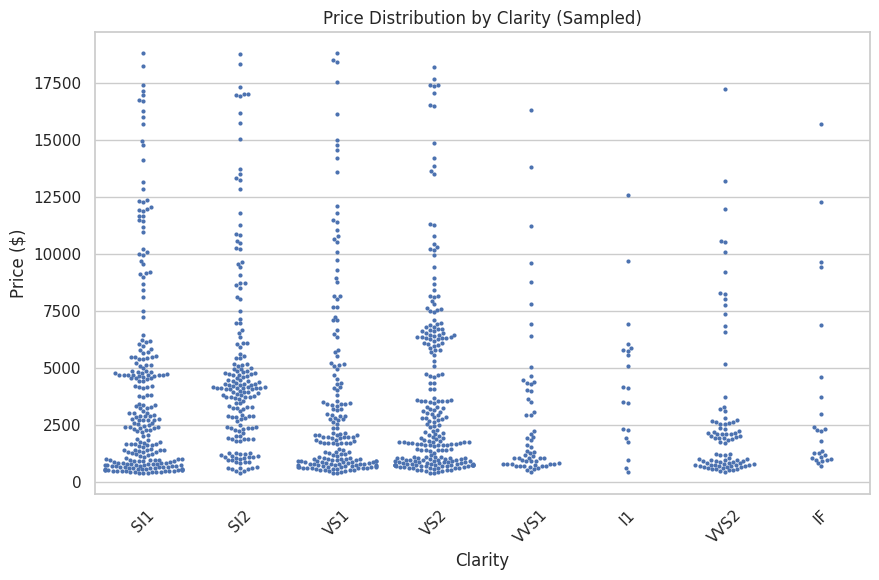

In [22]:
# Swarm Plot: Price by Clarity
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df.sample(1000), x='clarity', y='price', size=3)
plt.title('Price Distribution by Clarity (Sampled)')
plt.xlabel('Clarity')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

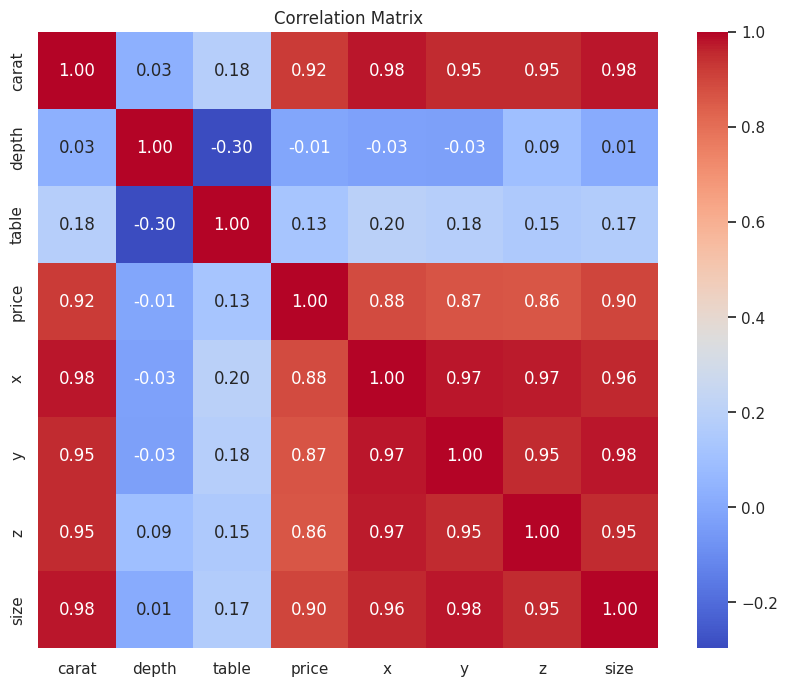

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()